In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.constants import N_A
import math
import pandas as pd

In [2]:
Target_cell_number = 2e5
well_size = 150e-6
r_ab = 1.25e-6 # in cm
t_end = 60*60*10
t = np.geomspace(1e-10, t_end, 500)
tspan = [1e-10, t_end]
z0 = [0, 0, 0]
T_cell_radius = 5e-4 #cm
T_cell_surface_area = 4*math.pi*((T_cell_radius)**2)
reaction_volume = (2/3)*math.pi*((r_ab)**3)
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)

In [3]:
def model_R_bispecific(t, z, Ainit, rtot1, rtot2, kon, kon1, koff, koff1, factor=1):
    k = Ainit*kon
    k1 = Ainit*kon1
    Atot = well_size*N_A*Ainit/Target_cell_number
    A0 = Atot - z[0] - z[1] - z[2]
    Ag1 = rtot1 - z[0] - z[2]
    Ag2 = rtot2 - z[1] - z[2]
    target_effective_conc1 =(rtot1)*(T_cell_surface_area)*(1/N_A)/(reaction_volume)
    target_effective_conc2 =(rtot2)*(T_cell_surface_area)*(1/N_A)/(reaction_volume)
    k21 = target_effective_conc1*kon
    k22 = target_effective_conc2*kon1

    dA10 = (k*(Ag1)*(A0)/rtot1) - koff*z[0] - (k22*(Ag2)*z[0]/rtot2) + koff1*z[2]
    dA01 = (k1*(Ag2)*(A0)/rtot2) - koff1*z[1] - (k21*(Ag1)*z[1]/rtot1) + koff*z[2]
    dA11 = (k22*(Ag2)*z[0]/rtot2) + (k21*(Ag1)*z[1]/rtot1) - 2*(koff + koff1)*z[2]

    return [dA10, dA01, dA11]

def model_S_bispecific(t, z, Ainit, rtot1, rtot2, kon, kon1, k21, k22, koff1, koff2, factor=1):
    k = Ainit*kon
    k1 = Ainit*kon1
    Atot = well_size*N_A*Ainit/Target_cell_number
    A0 = Atot - z[0] - z[1] - z[2]
    Ag1 = rtot1 - z[0] - z[2]
    Ag2 = rtot2 - z[1] - z[2]

    dA10 = (k*(Ag1)*(A0)/rtot1) - koff1*z[0] - (k22*(Ag2)*z[0]/rtot2) + koff2*z[2]
    dA01 = (k1*(Ag2)*(A0)/rtot2) - koff2*z[1] - (k21*(Ag1)*z[1]/rtot1) + koff1*z[2]
    dA11 = (k22*(Ag2)*z[0]/rtot2) + (k21*(Ag1)*z[1]/rtot1) - (koff1 + koff2)*z[2]

    return [dA10, dA01, dA11]

def model_S_monospecific(t, z, Ainit, rtot, kon, koff, k2, factor=1):
     k = Ainit*kon
     Atot = well_size*N_A*Ainit/Target_cell_number
     A0 = Atot - z[0] - z[1] 
     Ag = rtot - z[0] - 2*z[1]

     dA10 = 2*(k*Ag*A0/rtot) - koff*z[0] - (k2*Ag*z[0]/rtot) + 2*koff*z[1]
     dA11 = (k2*Ag*z[0]/rtot) - 2*koff*z[1]

     return [dA10, dA11]

def model_R_monospecific(t, z, Ainit, rtot, kon, koff, factor=1):
    k = Ainit*kon
    Atot = well_size*N_A*Ainit/Target_cell_number
    A0 = Atot - z[0] - z[1] 
    Ag = rtot - z[0] - 2*z[1]
    target_effective_conc1 =(rtot)*(tumour_cell_surface_area)*(1/N_A)/(reaction_volume)
    k2 = target_effective_conc1*kon

    dA10 = 2*(k*Ag*A0/rtot) - koff*z[0] - (k2*Ag*z[0]/rtot) + 2*koff*z[1]
    dA11 = (k2*Ag*z[0]/rtot) - 2*koff*z[1]

    return [dA10, dA11]

83443.02680376363 77412.96431989789
77412.96431989789


Text(0.5, 0, 'Antibody Concentration')

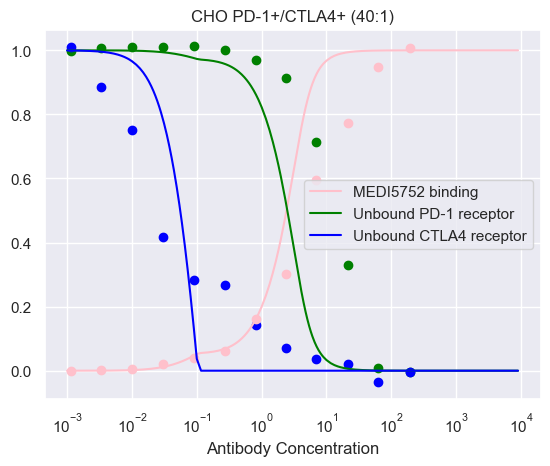

In [4]:
#​``Design and efficacy of a monovalent bispecifc PD-1/CTLA4 antibody that enhances 
#CTLA4 blockade on PD-1+ activated T cells'' (https://pubmed.ncbi.nlm.nih.gov/33419761/) 
# Figure 5b
df = pd.read_csv('pd1_10_1_data.csv')
x_data_pd1 = np.asarray(df['xdata'])    
y_data = np.asarray(df['ydata'])
y_data_pd1 = y_data/100

df1 = pd.read_csv('ctla4_data_10_1.csv')
x_data_ctla = np.asarray(df1['xdata'])
y_data1 = np.asarray(df1['ydata'])
y_data_ctla = y_data1/100

df2 = pd.read_csv('bispecific_pd1_ctla4_binding_data_10_1.csv')
x_data_ab = np.asarray(df2['xdata'])
y_data2 = np.asarray(df2['ydata'])
y_data_ab = y_data2/100

data = [y_data_pd1, y_data_ctla, y_data_ab]
data = np.array(data)

df = pd.read_csv('Mazor_bispecific_40_1.csv')
df1 = df[['Dataset_pd1_401', 'Unnamed: 1']]
x_data_pd1_40 = np.asarray(df1['Dataset_pd1_401'])
y_data_pd1_40 = np.asarray(df1['Unnamed: 1'])/100

df2 = df[['Dataset_ctla_40_1', 'Unnamed: 3']]
y_data_ctla4_40 = np.asarray(df2['Unnamed: 3'])/100

df3 = df[['Dataset_ab_binding_40_1', 'Unnamed: 5']]
y_data_ab_40 = np.asarray(df3['Unnamed: 5'])/100

data_40_1 = [y_data_pd1_40, y_data_ctla4_40, y_data_ab_40]
data_40_1 = np.array(data_40_1)

CTLA_4_D = 10.24e-8 #cm^2s^-1
PD_1_D = 9.5e-8 #cm^2^-1
T_cell_radius = 5e-4 #cm
k2_CTLA = 4*CTLA_4_D/(math.pi*((r_ab)**2))
k2_PD_1 = 4*PD_1_D/(math.pi*((r_ab)**2))
print(k2_CTLA, k2_PD_1)
r_tot_pd1_10_1 = 7.3e5
r_tot_ctla4_10_1 = 5.5e4
r_tot_pd1_40_1 = 1.4e6
r_tot_ctla4_40_1 = 3.9e4
kon_pd1 = 2.95e5
koff_pd1 = 2.36e-4
kon_ctla4 = 6.84e5
koff_ctla4 = 2.88e-4
print(k2_PD_1)
vals = np.linspace(1, 9, 50)

A0s1 = [1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)

pd1_vals = np.zeros_like(A0s)
ctla4_vals = np.zeros_like(A0s)
ab_vals = np.zeros_like(A0s)

for i in range(len(A0s)):

    z = solve_ivp(model_S_bispecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], r_tot_pd1_40_1, r_tot_ctla4_40_1, kon_pd1, 
                                                                                 kon_ctla4, k2_PD_1, k2_CTLA, koff_pd1, koff_ctla4))
    
    A10 = z.y[0]
    A01 = z.y[1]
    A11 = z.y[2]
    A10_STST = A10[-1]
    A01_STST = A01[-1]
    A11_STST = A11[-1]

    Ag1 = (r_tot_pd1_40_1 - A10_STST - A11_STST)/r_tot_pd1_40_1
    Ag2 = (r_tot_ctla4_40_1 - A01_STST - A11_STST)/r_tot_ctla4_40_1
    Ab = 1 - (((r_tot_pd1_40_1 - A10_STST - A11_STST) + (r_tot_ctla4_40_1 - A01_STST - A11_STST))/(r_tot_pd1_40_1 + r_tot_ctla4_40_1))

    pd1_vals[i] = Ag1
    ctla4_vals[i] = Ag2
    ab_vals[i] = Ab

sns.set_theme()
colors = ['green', 'blue', 'pink']
labels = ['Unbound PD-1 receptor', 'Unbound CTLA4 receptor', 'MEDI5752 binding']
for i, solution in enumerate(data_40_1):

    plt.plot(x_data_pd1, data_40_1[i], 'o', color=colors[i])

A0s1 = np.asarray(A0s)/1e-9
plt.plot(A0s1, ab_vals, 'pink', label='MEDI5752 binding')
plt.plot(A0s1, pd1_vals, 'green', label = 'Unbound PD-1 receptor')
plt.plot(A0s1, ctla4_vals, 'blue', label='Unbound CTLA4 receptor')
plt.xscale('log')
plt.legend(loc='best')
plt.title('CHO PD-1+/CTLA4+ (40:1)')
plt.xlabel('Antibody Concentration')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelS_bispecific_Mazor_pd1_40:1_paper.png')

Text(0.5, 0, 'Antibody Concentration')

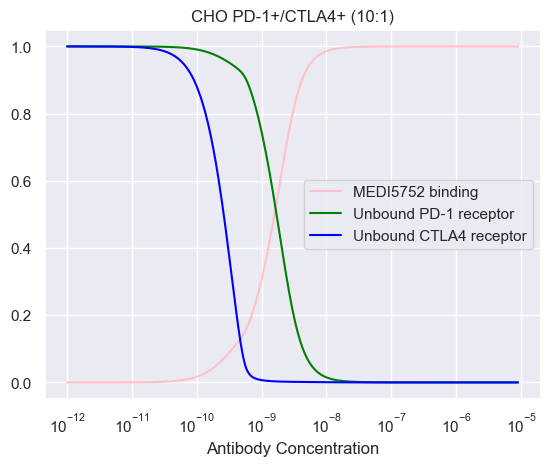

In [5]:
#​``Design and efficacy of a monovalent bispecifc PD-1/CTLA4 antibody that enhances 
#CTLA4 blockade on PD-1+ activated T cells'' (https://pubmed.ncbi.nlm.nih.gov/33419761/) 
# Figure 5b


pd1_vals = np.zeros_like(A0s)
ctla4_vals = np.zeros_like(A0s)
ab_vals = np.zeros_like(A0s)

for i in range(len(A0s)):

    z = solve_ivp(model_R_bispecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], r_tot_pd1_10_1, r_tot_ctla4_10_1, kon_pd1, 
                                                                                 kon_ctla4, koff_pd1, koff_ctla4))
    
    A10 = z.y[0]
    A01 = z.y[1]
    A11 = z.y[2]
    A10_STST = A10[-1]
    A01_STST = A01[-1]
    A11_STST = A11[-1]

    Ag1 = (r_tot_pd1_10_1 - A10_STST - A11_STST)/r_tot_pd1_10_1
    Ag2 = (r_tot_ctla4_10_1 - A01_STST - A11_STST)/r_tot_ctla4_10_1
    Ab = 1 - (((r_tot_pd1_10_1 - A10_STST - A11_STST) + (r_tot_ctla4_10_1 - A01_STST - A11_STST))/(r_tot_pd1_10_1 + r_tot_ctla4_10_1))

    pd1_vals[i] = Ag1
    ctla4_vals[i] = Ag2
    ab_vals[i] = Ab


plt.plot(A0s, ab_vals, 'pink', label='MEDI5752 binding')
plt.plot(A0s, pd1_vals, 'green', label = 'Unbound PD-1 receptor')
plt.plot(A0s, ctla4_vals, 'blue', label='Unbound CTLA4 receptor')
plt.xscale('log')
plt.legend(loc='best')
plt.title('CHO PD-1+/CTLA4+ (10:1)')
plt.xlabel('Antibody Concentration')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelR_bispecific_Mazor_pd1_10:1_paper.png')

Text(0.5, 0, 'Antibody Concentration')

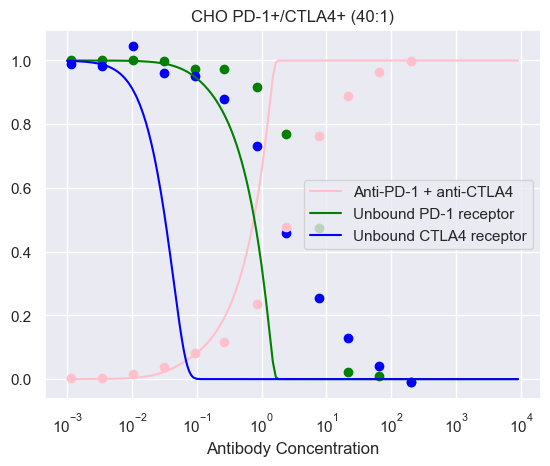

In [6]:
pd1_vals = np.zeros_like(A0s)
ctla4_vals = np.zeros_like(A0s)
ab_vals = np.zeros_like(A0s)
z0 = [0, 0]
df = pd.read_csv('Mazor_monospecific_40_1.csv')
df1 = df[['Dataset_pd1', 'Unnamed: 1']]
x_data_pd1_40 = np.asarray(df1['Dataset_pd1'])
y_data_pd1_40 = np.asarray(df1['Unnamed: 1'])/100

df2 = df[['Dataset_ctla4', 'Unnamed: 3']]
y_data_ctla4_40 = np.asarray(df2['Unnamed: 3'])/100

df3 = df[['Dataset_ab_binding', 'Unnamed: 5']]
y_data_ab_40 = np.asarray(df3['Unnamed: 5'])/100

data_40_1 = [y_data_pd1_40, y_data_ctla4_40, y_data_ab_40]
data_40_1 = np.array(data_40_1)

colors = ['green', 'blue', 'pink']
labels = ['Unbound PD-1 receptor', 'Unbound CTLA4 receptor', 'MEDI5752 binding']
for i, solution in enumerate(data_40_1):

    plt.plot(x_data_pd1_40, data_40_1[i], 'o', color=colors[i])
for i in range(len(A0s)):

     z = solve_ivp(model_S_monospecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], r_tot_pd1_40_1, kon_pd1, koff_pd1, k2_PD_1))
     w = solve_ivp(model_S_monospecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], r_tot_ctla4_40_1, kon_ctla4, koff_ctla4, k2_CTLA))

     P_A10 = z.y[0]
     P_A11 = z.y[1]
     C_A10 = w.y[0]
     C_A11 = w.y[1]
     P_A10_STST = P_A10[-1]
     P_A11_STST = P_A11[-1]
     C_A10_STST = C_A10[-1]
     C_A11_STST = C_A11[-1]

     Ag1 = (r_tot_pd1_40_1 - P_A10_STST - 2*P_A11_STST)/r_tot_pd1_40_1
     Ag2 = (r_tot_ctla4_40_1 - C_A10_STST - 2*C_A11_STST)/r_tot_ctla4_40_1
     
     Ab = 1 - (((r_tot_pd1_40_1 - P_A10_STST - 2*P_A11_STST) + (r_tot_ctla4_40_1 - C_A10_STST - 2*C_A11_STST))/(r_tot_pd1_40_1 + r_tot_ctla4_40_1))

     pd1_vals[i] = Ag1
     ctla4_vals[i] = Ag2
     ab_vals[i] = Ab
A0s1 = np.asarray(A0s)/1e-9
plt.plot(A0s1, ab_vals, 'pink', label='Anti-PD-1 + anti-CTLA4')
plt.plot(A0s1, pd1_vals, 'green', label = 'Unbound PD-1 receptor')
plt.plot(A0s1, ctla4_vals, 'blue', label='Unbound CTLA4 receptor')
plt.xscale('log')
plt.legend(loc='best')
plt.title('CHO PD-1+/CTLA4+ (40:1)')
plt.xlabel('Antibody Concentration')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelS_monospecific_Mazor_pd1_10:1_paper.png')

Text(0.5, 0, 'Antibody Concentration')

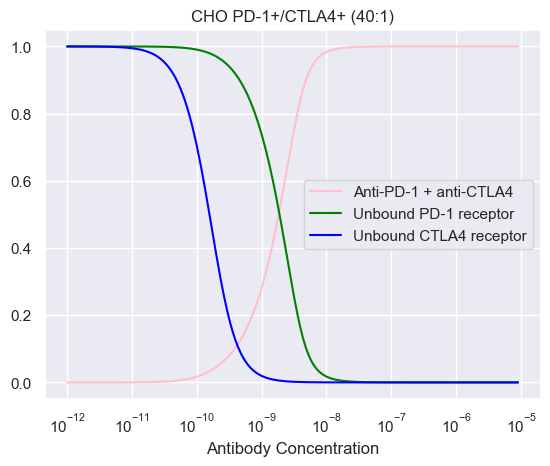

In [7]:
pd1_vals = np.zeros_like(A0s)
ctla4_vals = np.zeros_like(A0s)
ab_vals = np.zeros_like(A0s)
z0 = [0, 0]
for i in range(len(A0s)):

     z = solve_ivp(model_R_monospecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], r_tot_pd1_40_1, kon_pd1, koff_pd1))
     w = solve_ivp(model_R_monospecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], r_tot_ctla4_40_1, kon_ctla4, koff_ctla4))

     P_A10 = z.y[0]
     P_A11 = z.y[1]
     C_A10 = w.y[0]
     C_A11 = w.y[1]
     P_A10_STST = P_A10[-1]
     P_A11_STST = P_A11[-1]
     C_A10_STST = C_A10[-1]
     C_A11_STST = C_A11[-1]

     Ag1 = (r_tot_pd1_40_1 - P_A10_STST - 2*P_A11_STST)/r_tot_pd1_40_1
     Ag2 = (r_tot_ctla4_40_1 - C_A10_STST - 2*C_A11_STST)/r_tot_ctla4_40_1
     
     Ab = 1 - (((r_tot_pd1_40_1 - P_A10_STST - 2*P_A11_STST) + (r_tot_ctla4_40_1 - C_A10_STST - 2*C_A11_STST))/(r_tot_pd1_40_1 + r_tot_ctla4_40_1))

     pd1_vals[i] = Ag1
     ctla4_vals[i] = Ag2
     ab_vals[i] = Ab

plt.plot(A0s, ab_vals, 'pink', label='Anti-PD-1 + anti-CTLA4')
plt.plot(A0s, pd1_vals, 'green', label = 'Unbound PD-1 receptor')
plt.plot(A0s, ctla4_vals, 'blue', label='Unbound CTLA4 receptor')
plt.xscale('log')
plt.legend(loc='best')
plt.title('CHO PD-1+/CTLA4+ (40:1)')
plt.xlabel('Antibody Concentration')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelR_monospecific_Mazor_pd1_40:1_paper.png')

Text(0, 0.5, '$10^4$')

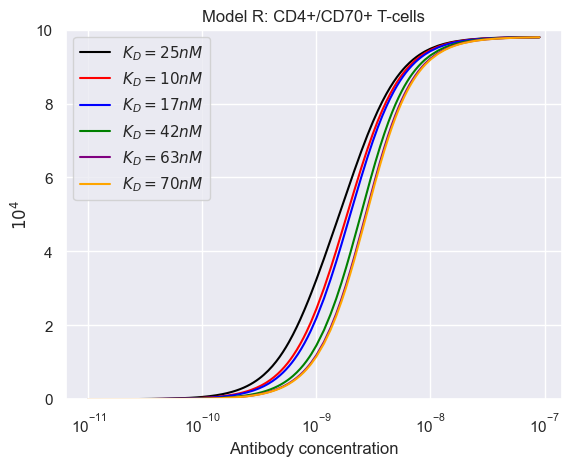

In [8]:
#Insights into the molecular basis of a bispecifc antibody's target selectivity Figure 3
D = 5e-10 
k2 = 4*D/(math.pi*((r_ab)**2))
z0 = [0, 0, 0]
kon_cd70 = 2e5
koff_cd70 = 4.9e-3
kons_cd4 = [2.8e5, 2e5, 2.8e5, 5.4e5, 5.6e5, 5.2e5]
koffs_cd4 = [2.6e-4, 1.9e-3, 4.7e-3, 2.3e-2, 3.5e-2, 3.6e-2]

rtot_cd4 = 4.6e4/1
rtot_cd70 = 5.2e4/1
factor=10000
binding_curves = []
vals = np.linspace(1, 9, 50)

A0s1 = [1e-11, 1e-10, 1e-9, 1e-8]
A0s = []

for x in A0s1:
    for val in vals:
        A0s.append(x*val)

for i in range(len(kons_cd4)):
    array = np.zeros_like(A0s)
    for j in range(len(A0s)):

        z = solve_ivp(model_R_bispecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[j], rtot_cd4, rtot_cd70, kons_cd4[i],
                                                                                     kon_cd70, koffs_cd4[i], koff_cd70, factor))
        
        A10 = z.y[0]
        A01 = z.y[1]
        A11 = z.y[2]
        A10st = A10[-1]
        A01st = A01[-1]
        A11st = A11[-1]

        Ab = A10st + A01st + A11st
        array[j] = Ab
    binding_curves.append(array)

labels = [r'$K_D=25nM$', r'$K_D=10nM$', r'$K_D=17nM$', r'$K_D=42nM$', r'$K_D=63nM$', r'$K_D=70nM$']
colors = ['black', 'red', 'blue', 'green', 'purple', 'orange']

for i in range(len(binding_curves)):
    plt.plot(A0s, binding_curves[i]/1e4, colors[i], label=labels[i])
plt.xscale('log')
plt.legend(loc='best')
plt.ylim(0, 10)
plt.title('Model R: CD4+/CD70+ T-cells')
plt.xlabel('Antibody concentration')
plt.ylabel(r'$10^4$')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelR_bispecific_Mazor_cd4+cd70+_paper.png')

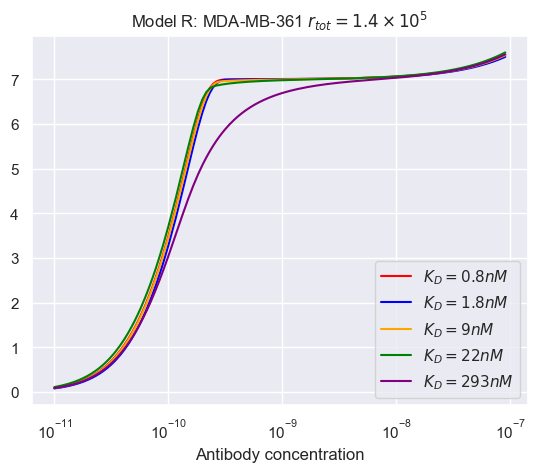

In [9]:
#Enhancement of immune effector functions by modulating IgG's intrinsic affinity fot target antigen Figure 3(a)-(c)
D = 3e-9
k2 = 4*D/(math.pi*((r_ab)**2))
z0 = [0, 0]
kons = [3.1e5, 2.6e5, 3e5, 3.8e5, 3.3e5]
koffs = [2.4e-4, 4.8e-4, 2.7e-3, 8.5e-3, 9.6e-2]
labels = [r'$K_D=0.8nM$', r'$K_D=1.8nM$', r'$K_D=9nM$', r'$K_D=22nM$', r'$K_D=293nM$']
colors = ['red', 'blue', 'orange', 'green', 'purple']

rtot = 1.4e5
factor = 50
binding_curves = []

for kon, koff in zip(kons, koffs):
    array = np.zeros_like(A0s)
    for i in range(len(A0s)):

        z = solve_ivp(model_S_monospecific, tspan, z0, method='Radau', t_eval=t, args=(A0s[i], rtot, kon, koff, k2, factor))

        A1 = z.y[0]
        A2 = z.y[1]
        A1_STST = A1[-1]
        A2_STST = A2[-1]

        Ab = A1_STST + A2_STST
        array[i] = Ab
    binding_curves.append(array)

for curve, color, label in zip(binding_curves, colors, labels):
    plt.plot(A0s, curve/1e4, color, label=label)

plt.xscale('log')
plt.title('Model R: MDA-MB-361 ' + r'$r_{tot}=1.4 \times 10^5$')
plt.xlabel('Antibody concentration')
plt.legend(loc='best')
#plt.savefig('/Users/lukeheirene/ADCC-Project/Figures/ModelR_monospecific_Mazor_MDA-MB-361egfr_paper.png')